In [1]:
%matplotlib inline
import numpy as np
# import matplotlib.font_managermn as fm
import matplotlib.pyplot as plt
# 配置中文
# # 添加字体 
# fm.fontMnager.addfont('../SimHei.ttf')
# 安装好字体后可以正常设置
plt.rcParams['font.sans-serif'] = ['SimHei'] # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是符号'-'显示为方块的问题

import pandas as pd
from py2neo import Graph, Node, Relationship

d:\Anaconda_other\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
d:\Anaconda_other\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 数据读取

neo4j 账号：neo4j 密码：jhc20021102

In [2]:
import ast
df_all_mv = pd.read_csv("../../数据集/处理后的数据集/movie_data_C3.csv")

# 将存储的字符串值修改成列表形式
df_c = df_all_mv[['ACTORS','DIRECTORS','GENRES','LANGUAGES','REGIONS']].copy()

# 将列中的字符串转换为列表
df_all_mv['ACTORS'] = df_c['ACTORS'].apply(ast.literal_eval)
df_all_mv['DIRECTORS'] = df_c['DIRECTORS'].apply(ast.literal_eval)
df_all_mv['GENRES'] = df_c['GENRES'].apply(ast.literal_eval)
df_all_mv['REGIONS'] = df_c['REGIONS'].apply(ast.literal_eval)

# 处理 LANGUAGES 列
def convert_languages(lang):
    if isinstance(lang, str) and lang == "英语":  # 直接字符串"英语"
        return [lang]  # 转换为列表
    else:
        return ast.literal_eval(lang)  # 否则正常转换
df_all_mv['LANGUAGES'] = df_c['LANGUAGES'].apply(convert_languages)

df_all_mv

,NAME,ACTORS,DIRECTORS,GENRES,LANGUAGES,REGIONS
0,情定河州,"[王博, 吴佳尼, 王姬, 高丽雯, 郭力行, 尹哲, 沈丹萍, 罗中旭, 臧金生, 罗刚,...",[尹哲],"[剧情, 爱情]",[汉语普通话],[中国大陆]
1,我不是李小龙,"[谷尚蔚, 吴孟达, 曾志伟, 杜海涛]",[洪金宝],"[动作, 爱情]",[汉语普通话],[中国大陆]
2,天地无用,"[禅婵, 梁宸, 张凡夕 François Chang]",[张凡夕],"[剧情, 爱情]","[汉语普通话 , 法语]","[中国大陆 , 法国]"
3,沙漠,"[吴敏, 菅浩栋, 董昕傧, 牛森浩, 毛腾飞, 崔树强, 陈小玲, 段亚丽]",[常标],[剧情],[汉语普通话],[中国香港]
4,事出有姻,"[玛丽亚·格拉齐亚·库奇诺塔, 黄海波, 王丽坤, 李赞, 赛尔乔·阿西西, 瓦莱丽亚·玛里...","[达里奥·巴尔迪, 杜军]",[剧情],"[汉语普通话 , 意大利语]","[中国大陆 , 意大利]"
...,...,...,...,...,...,...
64078,Bang,"[Darling Narita, Peter Greene, Michael Newland...",[Ash Baron-Cohen],[剧情],[英语],[美国]
64079,Primer,"[Shane Carruth, David Sullivan, Casey Gooden, ...",[Shane Carruth],"[科幻, 剧情, 惊悚]",[英语],[美国]
64080,El Mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez],"[动作, 犯罪, 惊悚]",[英语],"[墨西哥, 美国]"
64081,"Signed, Sealed, Delivered","[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...",[Scott Smith],"[喜剧, 剧情, 爱情, 电视电影]",[英语],[美国]


In [3]:
df_all_mv[df_all_mv['NAME'].str.contains('阿凡达', na=False)]

,NAME,ACTORS,DIRECTORS,GENRES,LANGUAGES,REGIONS
11,阿凡达5：追寻伊娃,"[佐伊·索尔达娜, 萨姆·沃辛顿, 西格妮·韦弗, 凯特·温丝莱特, 奥娜·卓别林, 史蒂芬...",[詹姆斯·卡梅隆],"[动作, 科幻, 奇幻, 冒险]",[英语],[美国]
16,阿凡达4：祖古骑士,"[佐伊·索尔达娜, 萨姆·沃辛顿, 西格妮·韦弗, 史蒂芬·朗, 凯特·温丝莱特, 克利夫·...",[詹姆斯·卡梅隆],"[动作, 科幻, 奇幻, 冒险]",[英语],[美国]
19,阿凡达3：带种者,"[佐伊·索尔达娜, 萨姆·沃辛顿, 史蒂芬·朗, 西格妮·韦弗, 凯特·温丝莱特, 克利夫·...",[詹姆斯·卡梅隆],"[剧情, 动作, 科幻, 奇幻, 冒险]",[英语],[美国]
42163,阿凡达,"[萨姆·沃辛顿, 佐伊·索尔达娜, 西格妮·韦弗, 史蒂芬·朗, 米歇尔·罗德里格兹, 吉奥...",[詹姆斯·卡梅隆],"[动作, 科幻, 战争, 冒险]","[英语 , 西班牙语]","[美国 , 英国]"


# 删减演员数量

In [4]:
from collections import Counter
df_actors = pd.DataFrame(df_all_mv['ACTORS'])
# 计算每个列表的长度
df_actors['LENGTH'] = df_actors['ACTORS'].apply(len)

In [11]:
# 取每一行列表的前十个值
df_actors['TOP_ACTORS'] = df_actors['ACTORS'].apply(lambda x: x[:10])

# 将获取的前十个值的列表展开为一维列表
all_actors = [actor for sublist in df_actors['TOP_ACTORS'] for actor in sublist]

# 统计唯一演员的数量
unique_actors_count = len(set(all_actors))

print("唯一演员数量:", unique_actors_count)

唯一演员数量: 104287


In [5]:
# 将所有演员提取到一个列表中
all_actors = [actor for sublist in df_actors['ACTORS'] for actor in sublist]

# 统计每个演员出现的次数
actor_counts = Counter(all_actors)

# 转换为DataFrame以便查看
actor_counts_df = pd.DataFrame(actor_counts.items(), columns=['Actor', 'Count'])

# 按Count值降序排列
actor_counts_df = actor_counts_df.sort_values(by='Count', ascending=False)

# 打印结果
actor_counts_df

,Actor,Count
14,曾志伟,209
1348,林雪,175
19777,午马,174
843,任达华,172
11472,谷峰,151
...,...,...
75560,王利平,1
75559,柴建朝,1
75558,封锡钧,1
75557,朗斯,1


In [7]:
actor_counts_df[actor_counts_df['Count']<=100]

,Actor,Count
1001,秦沛,100
109,陈观泰,100
50158,曹达华,100
10229,高飞,97
1523,狄龙,97
...,...,...
75560,王利平,1
75559,柴建朝,1
75558,封锡钧,1
75557,朗斯,1


In [32]:
df_actors[df_actors['LENGTH']<=10]

,ACTORS,LENGTH
1,"[谷尚蔚, 吴孟达, 曾志伟, 杜海涛]",4
2,"[禅婵, 梁宸, 张凡夕 François Chang]",3
3,"[吴敏, 菅浩栋, 董昕傧, 牛森浩, 毛腾飞, 崔树强, 陈小玲, 段亚丽]",8
4,"[玛丽亚·格拉齐亚·库奇诺塔, 黄海波, 王丽坤, 李赞, 赛尔乔·阿西西, 瓦莱丽亚·玛里...",7
6,"[舒淇, 佟大为, 姜武, 张国立, 夏雨, 吴大维, 潘玮柏, 刘德华]",8
...,...,...
64074,"[Michael Parle, Emma Eliza Regan, Patrick O'Do...",4
64077,"[Sasha Ramos, Erin Cline, Emily Rogers, Anthon...",5
64080,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",7
64081,"[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...",7


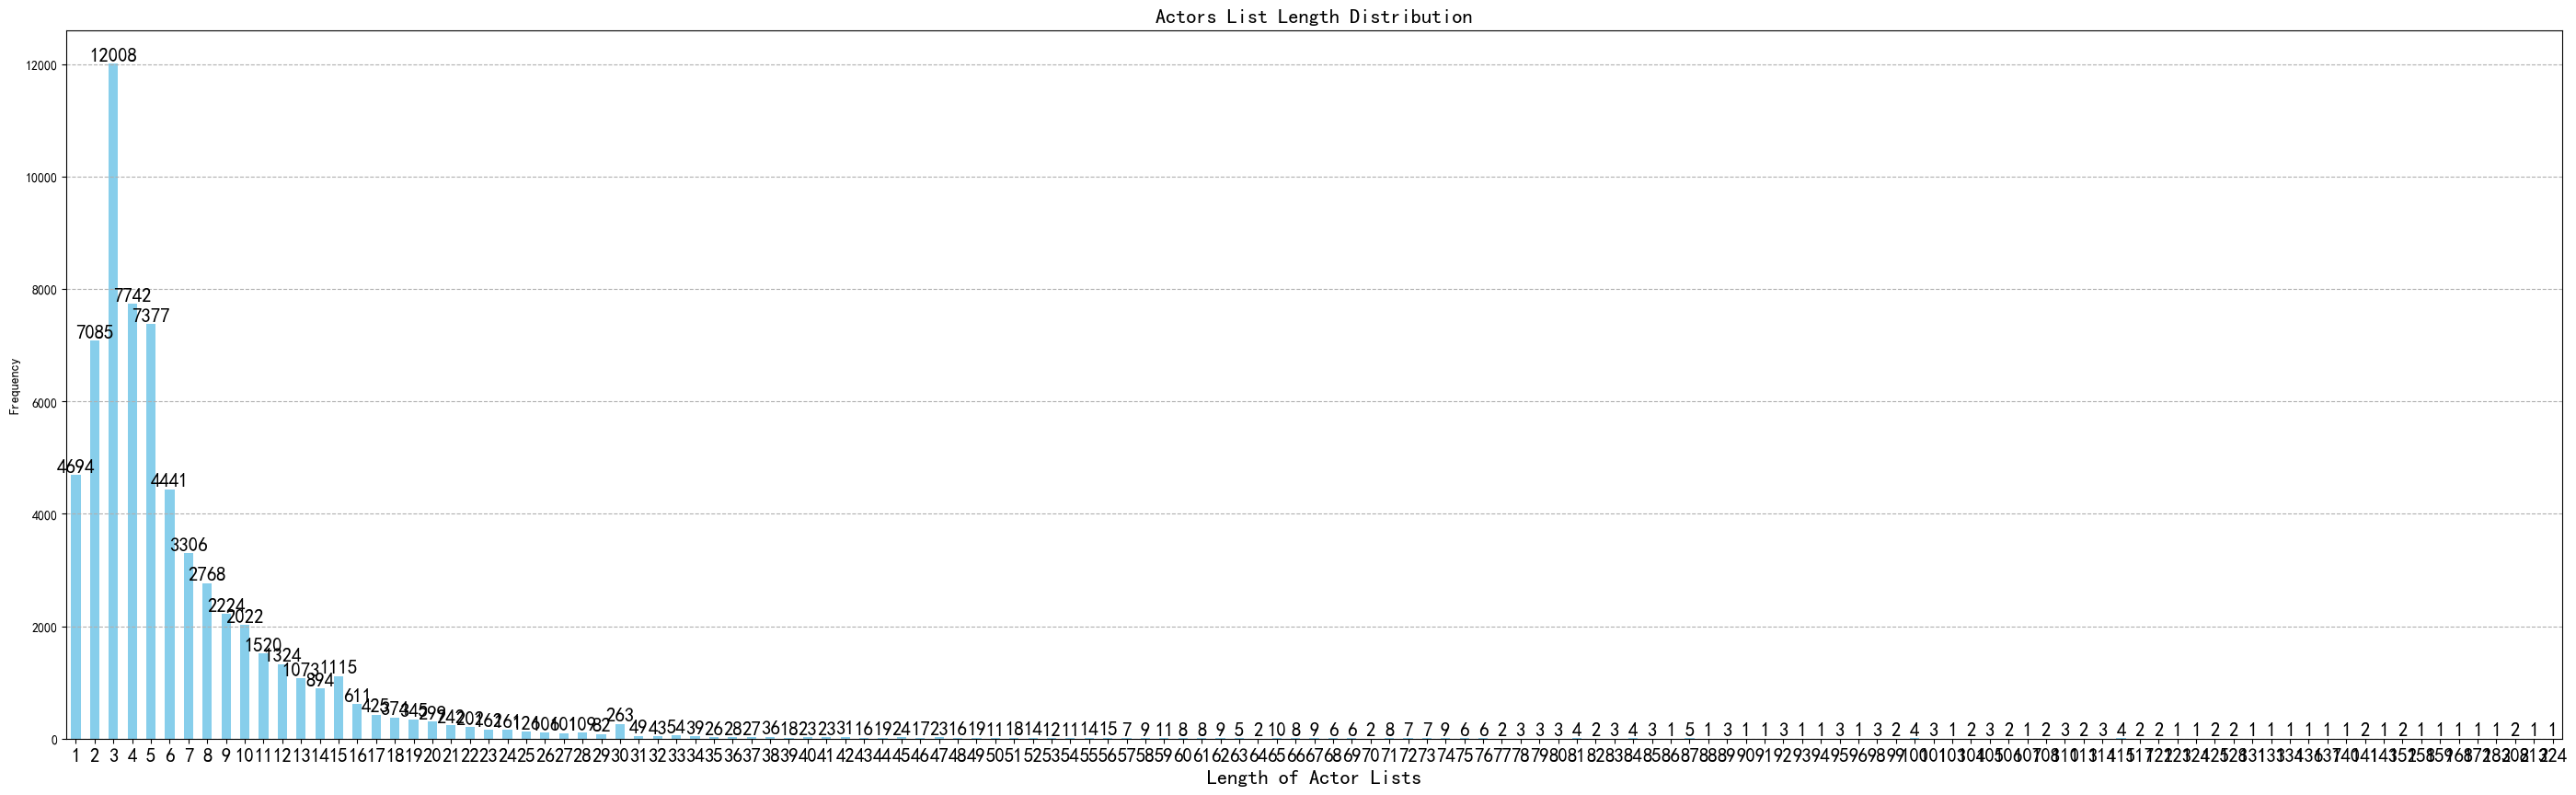

In [ ]:
# 统计长度的分布情况
length_distribution = df_actors['LENGTH'].value_counts().sort_index()

# 绘制条形图
plt.figure(figsize=(35, 10))
bars = length_distribution.plot(kind='bar', color='skyblue')

plt.title('Actors List Length Distribution',fontsize = 16)
plt.xlabel('Length of Actor Lists', fontsize = 16)
plt.ylabel('Frequency')
plt.xticks(rotation=0, fontsize = 15)
plt.grid(axis='y', linestyle='--')

# 在每个条形上显示数值
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             int(bar.get_height()), ha='center', va='bottom', fontsize = 15)
plt.show()

# 建立知识图谱

In [ ]:
from py2neo import Graph, Subgraph
from py2neo import Node, Relationship, Path

# 连接数据库
graph = Graph('bolt://localhost:7687/', auth=('neo4j', 'jhc20021102'))

In [77]:
df_relationship = pd.read_csv("../../数据集/处理后的数据集/relationship.csv")
df_relationship.replace('\s','',regex=True,inplace=True)
df_relationship

,NAME,TYPE.1,RELATIONSHIP.1,ACTORS,TYPE.2,RELATIONSHIP.2,DIRECTORS,TYPE.3,RELATIONSHIP.3,GENRES,TYPE.4,RELATIONSHIP.4,LANGUAGES,TYPE.5,RELATIONSHIP.5,REGIONS,TYPE.6
0,情定河州,电影,出演,王博,演员,导演,尹哲,导演,类型,剧情,类型,语言,汉语普通话,语言,制片地区,中国大陆,制片国家
1,情定河州,电影,出演,王博,演员,导演,尹哲,导演,类型,爱情,类型,语言,汉语普通话,语言,制片地区,中国大陆,制片国家
2,情定河州,电影,出演,吴佳尼,演员,导演,尹哲,导演,类型,剧情,类型,语言,汉语普通话,语言,制片地区,中国大陆,制片国家
3,情定河州,电影,出演,吴佳尼,演员,导演,尹哲,导演,类型,爱情,类型,语言,汉语普通话,语言,制片地区,中国大陆,制片国家
4,情定河州,电影,出演,王姬,演员,导演,尹哲,导演,类型,剧情,类型,语言,汉语普通话,语言,制片地区,中国大陆,制片国家
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730980,MyDatewithDrew,电影,出演,MattLeBlanc,演员,导演,JonGunn,导演,类型,纪录片,类型,语言,英语,语言,制片地区,美国,制片国家
1730981,MyDatewithDrew,电影,出演,MattLeBlanc,演员,导演,BrettWinn,导演,类型,纪录片,类型,语言,英语,语言,制片地区,美国,制片国家
1730982,MyDatewithDrew,电影,出演,BillD'Elia,演员,导演,BrianHerzlinger,导演,类型,纪录片,类型,语言,英语,语言,制片地区,美国,制片国家
1730983,MyDatewithDrew,电影,出演,BillD'Elia,演员,导演,JonGunn,导演,类型,纪录片,类型,语言,英语,语言,制片地区,美国,制片国家


In [78]:
df_r = df_relationship[0:1000]

# 数据处理
df_movie = df_r[['NAME','TYPE.1']]
df_actor = df_r[['ACTORS','TYPE.2']]
df_director = df_r[['DIRECTORS','TYPE.3']]
df_genre = df_r[['GENRES','TYPE.4']]
df_language = df_r[['LANGUAGES','TYPE.5']]
df_region = df_r[['REGIONS','TYPE.6']]

df_movie = df_movie.drop_duplicates() # 去重
df_movie.reset_index(drop=True, inplace=True) # 重新排序索引（防止建立节点时出错）

df_actor = df_actor.drop_duplicates()
df_actor.reset_index(drop=True, inplace=True)

df_director = df_director.drop_duplicates()
df_director.reset_index(drop=True, inplace=True)

df_genre = df_genre.drop_duplicates()
df_genre.reset_index(drop=True, inplace=True)

df_language = df_language.drop_duplicates()
df_language.reset_index(drop=True, inplace=True)

# df_region.replace('\s','',regex=True,inplace=True)
df_region = df_region.drop_duplicates()
df_region.reset_index(drop=True, inplace=True)

In [80]:
graph.delete_all()
# 建立节点
node_list = []

for i in range(len(df_movie['NAME'])):
    node = Node(df_movie['TYPE.1'][i], name = df_movie['NAME'][i])
    node_list.append(node)

for i in range(len(df_actor['ACTORS'])):
    node = Node(df_actor['TYPE.2'][i], name = df_actor['ACTORS'][i])
    node_list.append(node)

for i in range(len(df_director['DIRECTORS'])):
    node = Node(df_director['TYPE.3'][i], name = df_director['DIRECTORS'][i])
    node_list.append(node)

for i in range(len(df_genre['GENRES'])):
    node = Node(df_genre['TYPE.4'][i], name = df_genre['GENRES'][i])
    node_list.append(node)

for i in range(len(df_language['LANGUAGES'])):
    node = Node(df_language['TYPE.5'][i], name = df_language['LANGUAGES'][i])
    node_list.append(node)

for i in range(len(df_region['REGIONS'])):
    node = Node(df_region['TYPE.6'][i], name = df_region['REGIONS'][i])
    node_list.append(node)

nodes = Subgraph(node_list)
graph.create(nodes)

In [81]:
# 创建关系
re_list = []
count = 0
for i in df_r.values:
    count += 1
    print(count)
    m = graph.nodes.match(i[1],name=i[0]).first()
    a = graph.nodes.match(i[4],name=i[3]).first()
    d = graph.nodes.match(i[7],name=i[6]).first()
    g = graph.nodes.match(i[10],name=i[9]).first()
    l = graph.nodes.match(i[13],name=i[12]).first()
    r = graph.nodes.match(i[16],name=i[15]).first()
    
    rel_m_a = Relationship(a,i[2],m)
    rel_m_d = Relationship(d,i[5],m)
    rel_m_g = Relationship(g,i[8],m)
    rel_m_l = Relationship(l,i[11],m)
    rel_m_r = Relationship(r,i[14],m)
    re_list.append(rel_m_a)
    re_list.append(rel_m_d)
    re_list.append(rel_m_g)
    re_list.append(rel_m_l)
    re_list.append(rel_m_r)
#导入关系
nodes=Subgraph(relationships=re_list)
graph.create(nodes)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
